In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Linear Regression

We are trying to get a 3D model of the slope, intercept, and its likelihood in modeling the data provided. To do this approach we will use the following equation...

$$p(y|X, w) = \prod_{i=1}^n{\frac{1}{\sqrt{2\pi}\sigma_n}\exp\big[-\frac{(y_i-x_i^Tw)^2}{2\sigma_n^2}\big]}$$

This will give us the probability of how accurately one slope and one intercept will model the data. We can try multiple random weights to get a distribution.

Below we begin by manipulating the data and preparing it for modeling.

In [2]:
df = pd.read_csv('data/Advertising.csv').drop('Unnamed: 0', axis=1)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


<AxesSubplot: xlabel='TV', ylabel='Sales'>

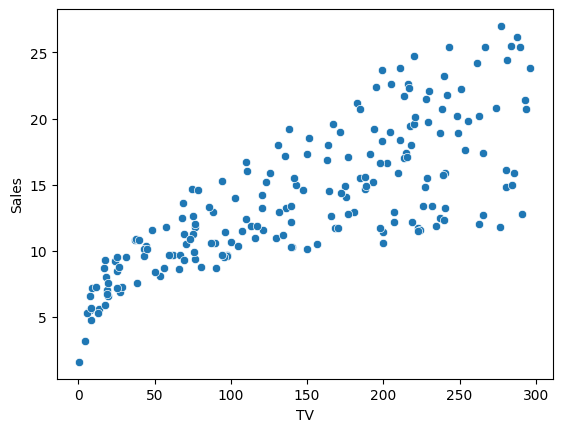

In [3]:
sns.scatterplot(x=df.TV, y=df.Sales)

In [4]:
# Obtains independent and dependent vectors
x = df.TV.to_numpy()
y = df.Sales.to_numpy()
x[0:5], y[0:5]

(array([230.1,  44.5,  17.2, 151.5, 180.8]),
 array([22.1, 10.4,  9.3, 18.5, 12.9]))

In [5]:
# Scales vectors
x = x / x.mean()
y = y / y.mean()
x[0:5], y[0:5]

(array([1.5648537 , 0.30263359, 0.11697298, 1.03031436, 1.22957648]),
 array([1.57603851, 0.74166518, 0.66321983, 1.31930825, 0.91995008]))

<AxesSubplot: >

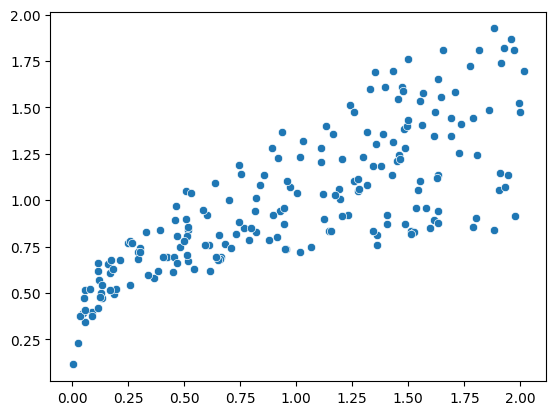

In [6]:
sns.scatterplot(x=x, y=y)

### Helper Functions
These functions will help us calculate the likelihood of a random weight

In [7]:
# Likelihood of one point
def like_point(x_i, y_i, w0, w1, noise_std=1):
    scale = 1 / (math.sqrt(2 * math.pi) * noise_std)
    return scale * math.exp(-((y_i - np.matmul([1, x_i], [w0, w1])) ** 2) / (2 * noise_std ** 2))

In [8]:
# Product of all the points
def likelihood(x=x, y=y, w0=0, w1=0, noise_std=1):
    prob_points = np.vectorize(like_point)(x, y, w0, w1, noise_std=noise_std)
    return np.prod(prob_points)

In [9]:
# Random weights used and calculated with
w = np.random.normal(0, 1, size=(1000, 2))
likely = np.vectorize(likelihood)(w0=w[:,0], w1=w[:,1])
likely

array([5.64087344e-271, 2.05188566e-083, 4.02907049e-139, 1.53231757e-157,
       0.00000000e+000, 1.24034225e-133, 5.79177285e-258, 0.00000000e+000,
       9.44075024e-127, 2.72355554e-098, 3.34774362e-137, 0.00000000e+000,
       7.96259893e-165, 3.83834109e-086, 1.49653851e-090, 0.00000000e+000,
       1.72368971e-086, 8.20099770e-170, 6.41502137e-128, 3.29338096e-089,
       9.68939228e-084, 1.30471413e-160, 2.04903343e-223, 3.18595095e-184,
       0.00000000e+000, 0.00000000e+000, 7.11118442e-136, 0.00000000e+000,
       1.20781278e-111, 0.00000000e+000, 1.32556006e-135, 0.00000000e+000,
       5.65958931e-297, 2.71820191e-093, 9.13554370e-287, 3.12158728e-128,
       4.45938392e-223, 2.03699185e-171, 4.49674719e-120, 1.20534593e-113,
       0.00000000e+000, 0.00000000e+000, 4.99678425e-282, 2.24469979e-132,
       0.00000000e+000, 1.41409046e-273, 1.62617812e-185, 4.26598217e-107,
       3.50191715e-113, 0.00000000e+000, 3.81292697e-163, 4.58684372e-203,
       7.31586855e-101, 2

In [10]:
# Converts results to data frames
res = pd.DataFrame([w[:,0], w[:,1], likely]).transpose()
res.columns = ['w0', 'w1', 'likelihood']
res

,w0,w1,likelihood
0,-1.477155,0.396805,5.640873e-271
1,0.457026,0.436589,2.051886e-83
2,0.290573,1.635186,4.029070e-139
3,-1.031596,0.727096,1.532318e-157
4,1.472283,1.775614,0.000000e+00
...,...,...,...
995,-0.946572,-0.032559,3.929622e-257
996,0.020461,1.036189,2.893241e-87
997,0.631515,-0.375622,3.612613e-118
998,0.538669,-0.184057,8.090277e-108


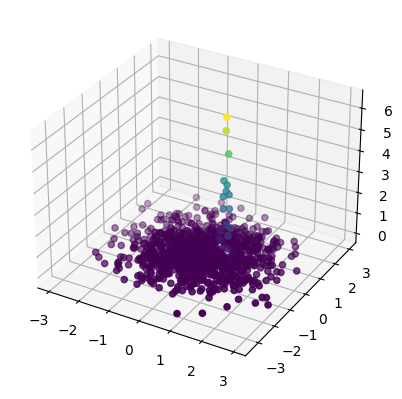

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(res.w0, res.w1, res.likelihood, c=res.likelihood, cmap='viridis')

In [12]:
res[res.likelihood == max(res.likelihood)]

,w0,w1,likelihood
665,0.547348,0.440624,6.375456e-83


In [15]:
model = LinearRegression()
model.fit(df.TV.values.reshape(-1, 1), df.Sales.values.reshape(-1, 1))
model.coef_

array([[0.04753664]])

In [16]:
model.intercept_

array([7.03259355])